In [101]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [102]:
def lagrange(i, q, x):
    return prod([(x-qj)/(q[i]-qj) for qj in q if qj != q[i]], axis=0)   # This is basically the mathematical definition.
                                                                        # Axis=0 tells to do an element wise product.

In [103]:
x = linspace(0,1,1025)
q = array([0, .2, .6,.8, 1])
y = array([lagrange(i,q,x) for i in range(len(q))])

In [104]:
y.shape

(5, 1025)

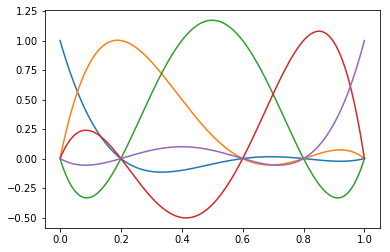

In [105]:
_=plot(x,y.T)

Now I want to compute the interpolation of a function using this basis, and determine the error I make.

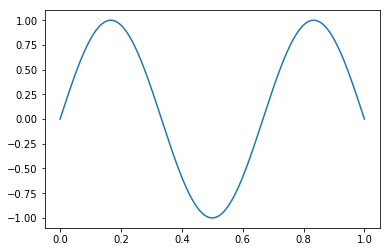

In [106]:
def myfun(x):
    return sin(3*pi*x)

plot(x, myfun(x))
    

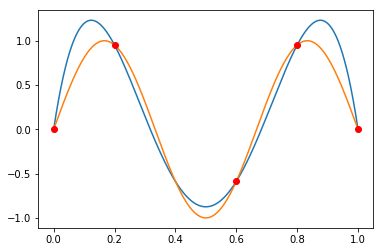

In [107]:
p = y.T.dot(myfun(q))
f = myfun(x)

plot(x,p)
plot(x,f)
plot(q,myfun(q), 'or')

What we are doing is:
 - $x_i$ where $i = 0,...,N$ points of evaluation
 - $q_{\alpha}$ where $\alpha = 0, ..., N_{q-1}$ support points
 - $y_{\alpha_i} = l_{\alpha}(x_i)$ are the Lagrange basis.
 
 
Then I do

$$
p(x_i) = (Lf)(x_i) = \sum_{\alpha = \infty}^{N_{q-1}} f(q_{\alpha})l_{\alpha}(x_i) = \sum_{\alpha = \infty}^{N_{q-1}} (y^T)_{i\alpha} f(q_{\alpha})
$$

Now I want to compute the error when I increase the number of $q$ points.

In [108]:
linfty = max(abs(f-p)) # This is an approximation of the L infty norm.
linfty

0.42275016832268486

In [109]:
N = range(3,30)
ERROR = []
for n in N:
    q = linspace(0,1,n)
    y = array([lagrange(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    f = myfun(x)
    ERROR.append(max(abs(f-p)))
    
    
ERROR
    

[1.5924679270293969,
 0.9999999999999999,
 0.6363497751839438,
 0.42275016832268486,
 0.1301432415538611,
 0.08949523799199655,
 0.01624533177501236,
 0.011370529674977703,
 0.0013774323802964172,
 0.0009743119326634242,
 8.484908260683599e-05,
 6.044467610055726e-05,
 3.979445918789182e-06,
 2.84894532245894e-06,
 1.4698760567033453e-07,
 1.055891530876707e-07,
 4.39007752373044e-09,
 3.161335970780499e-09,
 1.0770993819075869e-10,
 8.29088048215354e-11,
 9.134984435554827e-12,
 1.2184725450836709e-11,
 2.8885185909821587e-11,
 4.908067008368988e-11,
 1.1926477860857432e-10,
 1.49671719462674e-10,
 2.5239131618004507e-10]

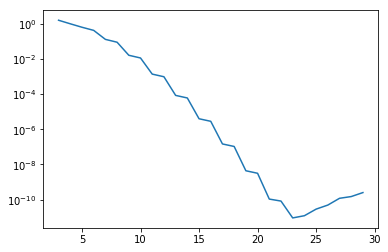

In [110]:
semilogy(N, ERROR)

Now let's ask for the C. points.

array([9.99266707e-01, 9.93413261e-01, 9.81774996e-01, 9.64488360e-01,
       9.41756022e-01, 9.13844499e-01, 8.81081028e-01, 8.43849729e-01,
       8.02587108e-01, 7.57776929e-01, 7.09944551e-01, 6.59650765e-01,
       6.07485220e-01, 5.54059509e-01, 5.00000000e-01, 4.45940491e-01,
       3.92514780e-01, 3.40349235e-01, 2.90055449e-01, 2.42223071e-01,
       1.97412892e-01, 1.56150271e-01, 1.18918972e-01, 8.61555009e-02,
       5.82439778e-02, 3.55116401e-02, 1.82250037e-02, 6.58673873e-03,
       7.33293074e-04])

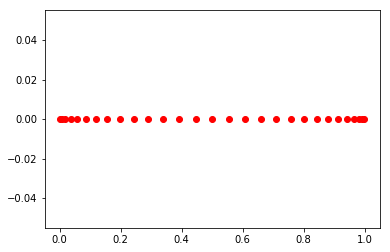

In [111]:
def cheb(n):
    return numpy.polynomial.chebyshev.chebgauss(n)[0]*0.5+0.5 # I return only the points since I do not need the weights.
    
c = cheb(n)
plot(c, 0*c, 'or')
c

In [112]:
def error(q, myfun):
    y = array([lagrange(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    f = myfun(x)
    return max(abs(f-p))

In [113]:
N = range(3,30)
error_equispaced = []
error_cheb = []
for n in N:
    error_cheb.append(error(cheb(n),myfun))
    error_equispaced.append(error(linspace(0,1,n), myfun))
    
    
    

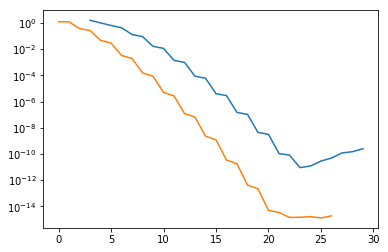

In [114]:
_=semilogy(N, error_equispaced, error_cheb)

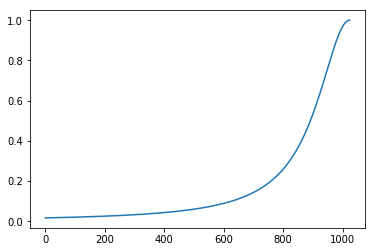

In [115]:
def myfun2(x):
    return 1/(1+60*(1-x)**2) # Quella brutta, lerrore esplode in teoria

plot(myfun2(x))

Now we should implement the B. polynomial. $Bf = \sum_i B_i^n(x) f(\frac{i}{n})$

In [116]:
def binomial(n,k):
    return 1 if k==0 else (0 if n==0 else binomial(n-1, k) + binomial(n-1, k-1))

binomial(4,2)

# Or you can use the scipy binomial

import scipy.special

scipy.special.binom(4,2)

6.0

In [146]:
def Bin(i, n, x):
    return scipy.special.binom(n, i)*((1-x)**i)*(x**(n-i))

In [150]:
x = linspace(0,1,1025)
n = 50
y = array([Bin(i,n,x) for i in range(0,n+1)])
y.shape

(51, 1025)

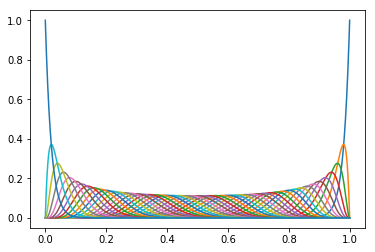

In [151]:
_=plot(x,y.T)

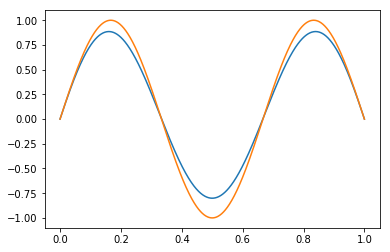

In [152]:
p=0
for i in range(0,n):
    p = p + Bin(i,n,x)*myfun(i/n)


f = myfun(x)

plot(x,p)
plot(x,f)


If you plot the error it slowly (linearly) goes down as $n$ increases. It is quite stable and does not oscilate. DO IT.
    
Now we build the $l_2$ matrix
    

In [153]:
n=5
M = zeros((5,5))

for i in range(n):
    for j in range(n):
        M[i,j] = 1.0/(i+j+1)

In [169]:
integrate = scipy.integrate.quad
F = array([integrate(lambda x: myfun(x)*x**i, 0, 1) for i in range(n)])



TypeError: only size-1 arrays can be converted to Python scalars

In [163]:
pi=linalg.solve(M,F)

(5, 2)

Test with abs(x-0.5) too